In [1]:
#Stolen from https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

#Tensorflow is the most commonly used python library for creating neural networks
import tensorflow as tf

#mnist is a library of images showing hand-written digits
#mnist is a commonly used introductory example
mnist = tf.keras.datasets.mnist

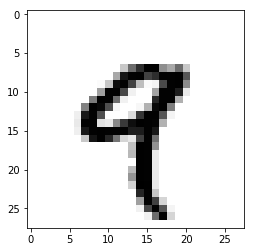

In [3]:
#split up the data into training and testing groups
#typically this step is not so simple
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#lets see an example
import matplotlib.pyplot as plt
plt.imshow(x_train[4],cmap=plt.cm.binary)
plt.show()

In [4]:
#normalized data is easier to train on. Go from 0 - 255 to 0 - 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
#build the model architecture
#sequential model is the simple feed-forward model
model = tf.keras.models.Sequential()

#flatten the data - easy to work with 1x784 then 28x28
model.add(tf.keras.layers.Flatten())

#Hidden layers - two densely connected layers with ReLu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#Final layer has 10 nodes - 1 for each possible digit
#Actiavtion is softmax (normalize exponential) so that we have a probability distribution among the nodes
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#define loss function and train the model
#adam optimizer - uses gradient updates as well as moving average of past gradients 
#sparse categorical cross entropy - fits difference values to log curve. Values really far off will return higher cost values
# metric or 'goal' - typically use accuracy, there are some edge cases when you are focused on avoiding false-neg or pos
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

W1120 17:29:14.435858  6776 deprecation.py:506] From C:\Users\Owner\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/3
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2663 - acc: 0.9232
Epoch 2/3
60000/60000 [==============================] - 7s 111us/sample - loss: 0.1095 - acc: 0.9657
Epoch 3/3
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0738 - acc: 0.9769


In [6]:
#test the model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.0932 - acc: 0.9725
0.09322709605935961 0.9725


In [7]:
#models can be saved and used later
model.save('epic_num_reader.model')

In [8]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

#generate predictions. This shows the level of activation in each neuron for each test sample
#definition of accuracy
predictions = new_model.predict(x_test)
print(predictions)

W1120 17:30:22.680439  6776 deprecation.py:506] From C:\Users\Owner\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1120 17:30:22.682441  6776 deprecation.py:506] From C:\Users\Owner\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1120 17:30:22.914309  6776 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


[[3.25412941e-09 6.06653217e-08 7.31312184e-06 ... 9.99986291e-01
  9.01926711e-08 3.39246753e-07]
 [1.02596646e-10 6.35223323e-03 9.93634224e-01 ... 2.55276356e-09
  1.91567420e-08 1.70955426e-13]
 [9.49745260e-09 9.99880075e-01 4.88325350e-06 ... 1.44089781e-05
  1.60761556e-05 1.84454507e-07]
 ...
 [6.78345602e-10 8.97584016e-07 1.48883839e-09 ... 1.77331572e-06
  6.70831867e-07 3.64660300e-05]
 [5.20791957e-07 1.70727817e-05 6.41794244e-08 ... 2.83153440e-07
  2.87489209e-04 1.63791558e-08]
 [2.28376340e-08 8.64756728e-08 4.48747137e-08 ... 1.31432587e-10
  5.78295740e-08 2.02932671e-09]]


2


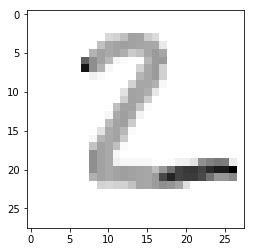

In [9]:
import numpy as np

#the index of the maximum value is the predicted number
print(np.argmax(predictions[1]))
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()

0


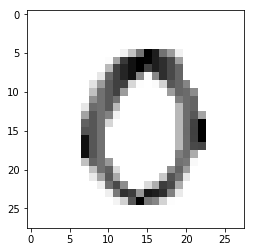

In [10]:
print(np.argmax(predictions[13]))
plt.imshow(x_test[13],cmap=plt.cm.binary)
plt.show()

6


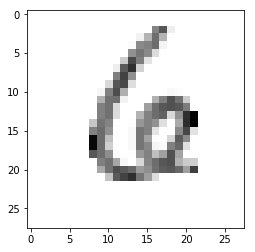

In [11]:
print(np.argmax(predictions[123]))
plt.imshow(x_test[123],cmap=plt.cm.binary)
plt.show()